In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sqrt
from scipy.optimize import curve_fit
from scipy.stats import multivariate_normal
from scipy.constants import pi
from scipy.constants import G
from scipy.constants import c
import pdb
import pickle

((array([5, 5, 6, 6, 9, 9], dtype=int64), array([2549, 2550, 2550, 2551, 2552, 2553], dtype=int64)), array([  80.,   80.,   96.,   96.,  144.,  144.]))
-47763.2000001
f = 106.025, f_dot = 4789.169
M_scrpt = 31.209 M_Sun


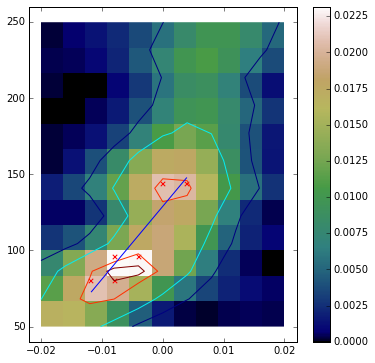

In [81]:
%matplotlib inline

def g(x, m, b):
    return m*x + b

def M(f, f_dot):
    solar_mass = 1.989e30
    return (1./solar_mass)*((c**3.)/G)*((5./96.)*(pi**(-8./3.))*(f**(-11./3.))*f_dot)**(3./5.)

with open('ligo_freq_t.p', 'r') as f:     #Makes ligo data available to use in python
    spec_data = pickle.load(f)

times = spec_data['t']
freqs = spec_data['freqs']
spec_H1 = spec_data['spec_H1']

tevent = np.median(times)     #Central point of times data
deltat = .02

max_spec_H1 = spec_H1.max()     #Maximum value of spec_H1 for later use in contour levels

freq_idx = np.where((freqs >= 50.)*(freqs < 250.))     #Chooses a specific region of frequency to analyze
t_idx = np.where((times >= tevent-deltat)*(times < tevent+deltat))     #Chooses region of time, centered around tevent, and gives indices of selected region

idx2d = np.meshgrid(freq_idx, t_idx)     #A list that consists of two 2D numpy arrays
spec_img = spec_H1[idx2d].T     #Chooses specific region of spectrogram to plot, using values from idx2d

sig1, sig2, sig3, sig4 = .25*max_spec_H1, .5*max_spec_H1, .85*max_spec_H1, .95*max_spec_H1
contour_levels = [sig1, sig2, sig3, sig4]
extent = [-0.02, 0.02, 50, 250]

idx85 = np.where(spec_H1 >= sig3)
f85 = freqs[idx85[0]]
print(idx85, f85)
f = np.average(f85, weights=(spec_H1[idx85])**2)

coeffs, cov = curve_fit(g, times[idx85[1]], f85, p0=[4700., 50])
f_dot = coeffs[0]
b_best = coeffs[1]
print(b_best)
chirp_mass = M(f, f_dot)

print("f = {:.3f}, f_dot = {:.3f}".format(f, f_dot))
print("M_scrpt = {:.3f} M_Sun".format(chirp_mass))

x = times[idx85[1]]-tevent
# x = np.linspace(-.02, .02, len(times[idx85[1]]))

fig, ax = plt.subplots(figsize = (6, 6))
plt.scatter(x, f85, marker='x', c='r')
plt.plot(x, g(x, f_dot, 129))
im_ax = plt.imshow(spec_img, extent=extent, cmap=plt.cm.gist_earth, aspect='auto', interpolation='none', origin='lower')     #Plots numpy array as image
CS = plt.contour(spec_img, linestyles=['-','-','-'], levels=contour_levels, extent=extent)     #Overlays contours onto 
fig.colorbar(im_ax)     #Adds color bar next to plot, for reference

plt.show()